In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import *

%matplotlib inline


In [3]:
df_train = pd.read_csv("/data/MNIST/mnist_train.csv", header=None)
df_test = pd.read_csv("/data/MNIST/mnist_test.csv", header= None)

In [4]:
df_train.shape

(60000, 785)

In [5]:
df_test.shape

(10000, 785)

In [6]:
28 * 28

784

In [38]:
X_train = df_train.values[:,1:]
y_train = df_train.values[:,0]

X_test = df_test.values[:,1:]
y_test = df_test.values[:,0]

In [9]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

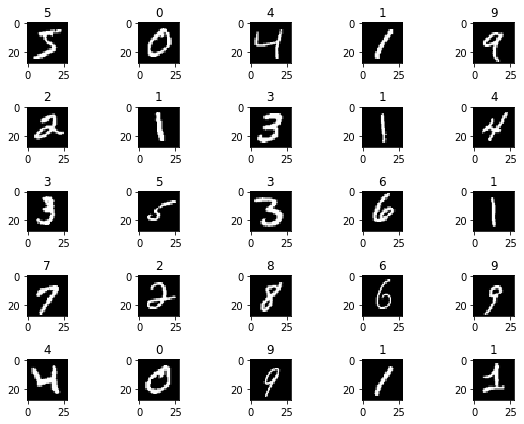

In [21]:
fig, axes = plt.subplots(5, 5, figsize = (8, 6))
for i, ax in enumerate(fig.axes):
    ax.imshow(X_train[i].reshape((28, 28)), cmap = "gray")
    ax.set_title(y_train[i])
plt.tight_layout()

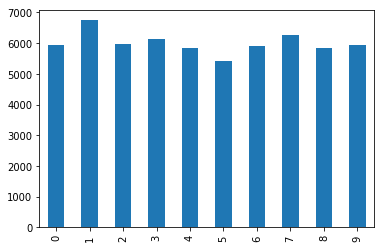

In [23]:
pd.Series(y_train).value_counts().sort_index().plot.bar()

In [24]:
X_train.shape

(60000, 784)

In [25]:
a = X_train.flatten()
a.shape

(47040000,)

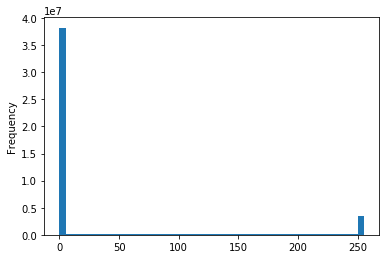

In [27]:
pd.Series(a).plot.hist(bins = 50)

In [29]:
len(a[a==0])/len(a)

0.8087977040816327

In [31]:
pd.Series(a).describe()

count    4.704000e+07
mean     3.331842e+01
std      7.856749e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.550000e+02
dtype: float64

In [39]:
X_train = df_train.values[:,1:] / 255.0
X_test = df_test.values[:,1:] /255.0


In [41]:
%%time 
est = linear_model.SGDClassifier(loss = "log", n_jobs=8
                        , tol=1e-5, alpha=0.01, max_iter=1000, eta0=1e-3,
                                 learning_rate="invscaling")

est.fit(X_train, y_train)
est.score(X_test, y_test)

CPU times: user 27min 28s, sys: 2.14 s, total: 27min 30s
Wall time: 4min 50s


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [42]:
est.score(X_test, y_test)

0.8678

In [52]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

In [51]:
Y_train = keras.utils.to_categorical(y_train)
Y_test = keras.utils.to_categorical(y_test)
pd.DataFrame(Y_train)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [58]:
from tensorflow import keras
from time import time
int(time())

1559287183

In [65]:
tensorboard = keras.callbacks.TensorBoard(log_dir="/tmp/tf/" + str(int(time())))

model = keras.Sequential([
    keras.layers.InputLayer(input_shape = (784,)),
    keras.layers.Dense(units=400, activation="relu"),
    keras.layers.Dense(units=100, activation="relu"),
    keras.layers.Dense(units=10, activation="softmax")
])

model.compile(optimizer= keras.optimizers.Adam(lr = 0.001)
              , metrics=["accuracy"]
              , loss=keras.losses.categorical_crossentropy)

model.summary()

model.fit(X_train
          , Y_train, epochs = 20
          , validation_data=(X_test, Y_test)
          , batch_size=128
          , callbacks = [tensorboard]
         )


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_19 (Dense)             (None, 100)               40100     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1010      
Total params: 355,110
Trainable params: 355,110
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2526 - acc: 0.9269 - val_loss: 0.1171 - val_acc: 0.9636
Epoch 2/20
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0962 - acc: 0.9707 - val_loss: 0.1006 - val_acc: 0.9680
Epoch 3/20
60000/60000 [==============================] - 4s 62us/sample

In [66]:
X_train_image = X_train.reshape((-1, 28, 28, 1))
X_test_image = X_test.reshape((-1, 28, 28, 1))
X_train_image.shape

(60000, 28, 28, 1)

In [68]:
tensorboard = keras.callbacks.TensorBoard(log_dir="/tmp/tf/" + str(int(time())))

model = keras.Sequential([
    keras.layers.InputLayer(input_shape = (28,28, 1)),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(64, kernel_size=(5, 5), activation="relu"),
    keras.layers.MaxPool2D(),  
    keras.layers.Dropout(rate=0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(units=400, activation="relu"),
    keras.layers.Dense(units=100, activation="relu"),
    keras.layers.Dense(units=10, activation="softmax")
])

model.compile(optimizer= keras.optimizers.Adam(lr = 0.001)
              , metrics=["accuracy"]
              , loss=keras.losses.categorical_crossentropy)

model.summary()

model.fit(X_train_image
          , Y_train, epochs = 20
          , validation_data=(X_test_image, Y_test)
          , batch_size=128
          , callbacks = [tensorboard]
         )


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
___________________________